In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

line_markers = ['-.','-,','-o','-v','-^','-<','->','-1','-2','-3','-4','-s','-p','-*','-h','-H','-+','-x','-D','-d','-|','-_']
line_markers = ['*','h','<','4','x','d','|','_']

In [2]:
def accuracy(file_name, tasknum = 10):
    acc = np.zeros(tasknum)
    with open(file_name, 'r') as f:
        data = f.read().splitlines()
        for i in range(len(data)):
            acc[i] = data[i]
    return acc

In [3]:
acc = accuracy('ER_Distillation_CN_results/LD_CIFAR100_lwf_0_memsz_2000_alpha_1.0_s_5_beta_0.0001_lr_0.1_batch_64_epoch_150.txt')
print(acc)

[90. 69. 55. 43. 34. 31. 28. 24. 22. 20.]


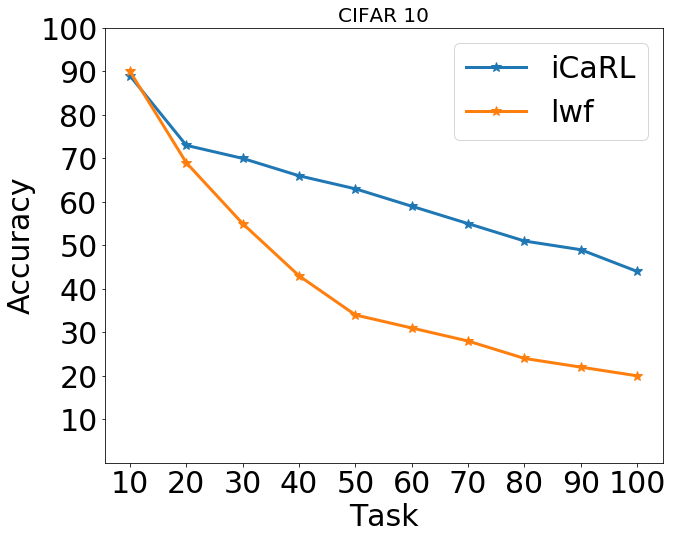

In [4]:
task = (np.arange(10) + 1)*10
iCaRL = [89,73,70,66,63,59,55,51,49,44]
lwf = accuracy('ER_Distillation_CN_results/LD_CIFAR100_lwf_0_memsz_2000_alpha_1.0_s_5_beta_0.0001_lr_0.1_batch_64_epoch_150.txt')

plt.figure(figsize=(10,8))
plt.plot(task, iCaRL, linestyle='-', label='iCaRL',marker = line_markers[0], linewidth=3, markersize=10)
plt.plot(task, lwf, linestyle='-', label='lwf',marker = line_markers[0], linewidth=3, markersize=10)

plt.xticks([10,20,30,40,50,60,70,80,90,100], fontsize = 30)

plt.xlabel('Task', fontsize=30)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim(0,100)
plt.yticks([10,20,30,40,50,60,70,80,90,100], fontsize = 30)
# plt.set_yticklabels(['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.title('CIFAR 10', fontsize = 20)
plt.legend(loc = 'upper right', fontsize=30)


In [5]:
seed_num = 8
strategy_arr = ['Reservior', 'RingBuffer', 'Weighted']
ft_init_lr_diff = {}
name = 'FT_CIFAR_results/FT_init_lr_diff_CIFAR100_{}_{}_memsz_2000_base_10_batch_128_epoch_100_{}_Soft.txt'
tasknum = 10
for approach in ['er','coreset']:
    ft_init_lr_diff[approach] = {}
    for strategy in strategy_arr:
        ft_init_lr_diff[approach][strategy] = np.zeros((seed_num, tasknum))
        for seed in range(seed_num):
            ft_init_lr_diff[approach][strategy][seed] = accuracy(name.format(approach,seed,strategy), tasknum=tasknum)
            

In [6]:
seed_num = 6
strategy_arr = ['RingBuffer']
ft_all_curr_head = {}
name = 'FT_CIFAR_results/FT_all_curr_head_CIFAR100_{}_{}_memsz_2000_base_10_batch_128_epoch_100_factor_2_{}_Soft.txt'
tasknum = 10
for approach in ['er']:
    ft_all_curr_head[approach] = {}
    for strategy in strategy_arr:
        ft_all_curr_head[approach][strategy] = np.zeros((seed_num, tasknum))
        for seed in range(seed_num):
            ft_all_curr_head[approach][strategy][seed] = accuracy(name.format(approach,seed,strategy), tasknum=tasknum)
            

In [7]:
seed_num = 6
strategy_arr = ['RingBuffer']
ft_prev_curr_head = {}
name = 'FT_CIFAR_results/FT_prev_curr_head_CIFAR100_{}_{}_memsz_2000_base_10_batch_128_epoch_100_factor_2_{}_Soft.txt'
tasknum = 10
for approach in ['er']:
    ft_prev_curr_head[approach] = {}
    for strategy in strategy_arr:
        ft_prev_curr_head[approach][strategy] = np.zeros((seed_num, tasknum))
        for seed in range(seed_num):
            ft_prev_curr_head[approach][strategy][seed] = accuracy(name.format(approach,seed,strategy), tasknum=tasknum)
            

In [8]:
seed_num = 6
strategy_arr = ['RingBuffer']
ft_test_prev_new = {}
name = 'FT_CIFAR_results/FT_test_prev_new_CIFAR100_{}_{}_memsz_2000_base_10_batch_128_epoch_100_factor_2_{}_Soft.txt'
tasknum = 10
for approach in ['er','coreset']:
    ft_test_prev_new[approach] = {}
    for strategy in strategy_arr:
        ft_test_prev_new[approach][strategy] = np.zeros((seed_num, tasknum))
        for seed in range(seed_num):
            ft_test_prev_new[approach][strategy][seed] = accuracy(name.format(approach,seed,strategy), tasknum=tasknum)
            

[86.66666667 86.33333333 79.66666667 72.33333333 67.         61.66666667
 56.16666667 52.5        48.         44.16666667]


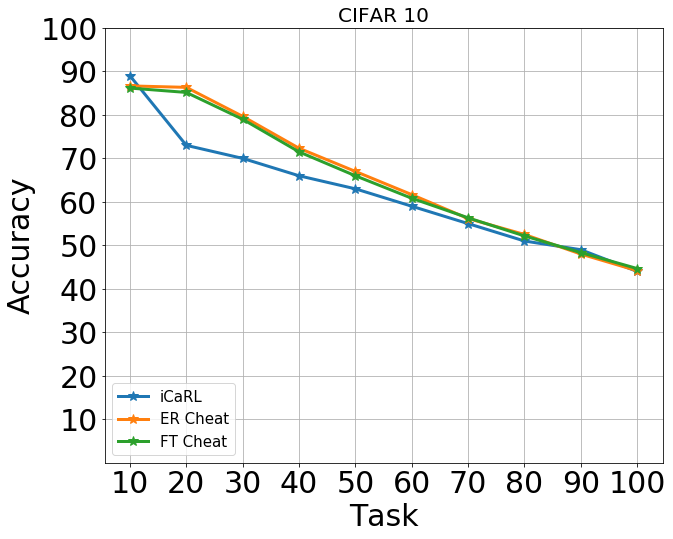

In [12]:
task = (np.arange(10) + 1)*10
iCaRL = [89,73,70,66,63,59,55,51,49,44]

plt.figure(figsize=(10,8))
plt.plot(task, iCaRL, linestyle='-', label='iCaRL',marker = line_markers[0], linewidth=3, markersize=10)
# plt.plot(task, ft_init_lr_diff['er']['Reservior'].mean(axis=0), linestyle='-', label='er Reservior',marker = line_markers[0], linewidth=3, markersize=10)
# plt.plot(task, ft_init_lr_diff['er']['RingBuffer'].mean(axis=0), linestyle='-', label='er RingBuffer',marker = line_markers[0], linewidth=3, markersize=10)
# plt.plot(task, ft_init_lr_diff['er']['Weighted'].mean(axis=0), linestyle='-', label='er Weighted',marker = line_markers[0], linewidth=3, markersize=10)
# plt.plot(task, ft_init_lr_diff['coreset']['Reservior'].mean(axis=0), linestyle='-', label='coreset Reservior',marker = line_markers[0], linewidth=3, markersize=10)
# plt.plot(task, ft_init_lr_diff['coreset']['RingBuffer'].mean(axis=0), linestyle='-', label='coreset RingBuffer',marker = line_markers[0], linewidth=3, markersize=10)
# plt.plot(task, ft_init_lr_diff['coreset']['Weighted'].mean(axis=0), linestyle='-', label='coreset Weighted',marker = line_markers[0], linewidth=3, markersize=10)

# plt.plot(task, ft_all_curr_head['er']['RingBuffer'].mean(axis=0), linestyle='-', label='er RingBuffer all_curr_head',marker = line_markers[0], linewidth=3, markersize=10)
# plt.plot(task, ft_prev_curr_head['er']['RingBuffer'].mean(axis=0), linestyle='-', label='er RingBuffer prev_curr_head',marker = line_markers[0], linewidth=3, markersize=10)
plt.plot(task, ft_test_prev_new['er']['RingBuffer'].mean(axis=0), linestyle='-', label='ER Cheat',marker = line_markers[0], linewidth=3, markersize=10)
plt.plot(task, ft_test_prev_new['coreset']['RingBuffer'].mean(axis=0), linestyle='-', label='FT Cheat',marker = line_markers[0], linewidth=3, markersize=10)

plt.grid(b=True, which='major', axis='both')
plt.xticks([10,20,30,40,50,60,70,80,90,100], fontsize = 30)

plt.xlabel('Task', fontsize=30)
plt.ylabel('Accuracy', fontsize=30)
plt.ylim(0,100)
plt.yticks([10,20,30,40,50,60,70,80,90,100], fontsize = 30)
# plt.set_yticklabels(['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'])
plt.title('CIFAR 10', fontsize = 20)
plt.legend(loc = 'lower left', fontsize=15)

print(ft_test_prev_new['er']['RingBuffer'].mean(axis=0),)